In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from vega_datasets import data

In [4]:
stocks = data.stocks()
# to transform such that each symbol is it's own column and each row is one month
stocks = stocks.pivot_table('price', 'date', 'symbol')

In [9]:
stocks.GOOG.isnull().value_counts()

False    68
True     55
Name: GOOG, dtype: int64

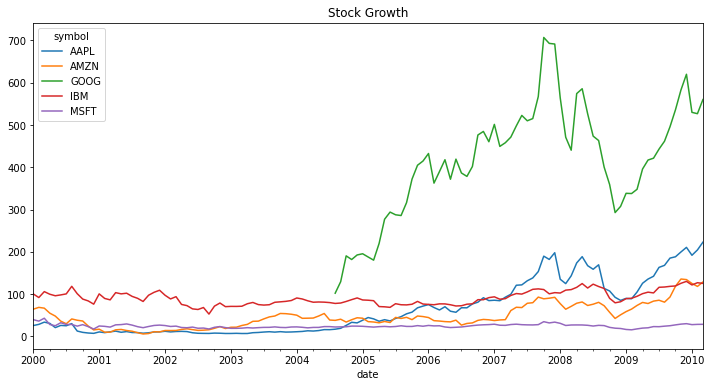

In [22]:
stocks.plot(figsize=(12,6))
plt.title('Stock Growth')
plt.show()

### Splitting into Train, Validate and Test

In [23]:
train_size = int(len(stocks) * .5)
train_size

61

In [24]:
validate_size = int(len(stocks) * .3)
validate_size

36

In [26]:
test_size = int(len(stocks) - train_size - validate_size)
test_size

26

### Verifying Splits

In [27]:
validate_end_index = train_size + validate_size

In [28]:
train = stocks[: train_size]
validate = stocks[train_size : validate_end_index]
test = stocks[validate_end_index : ]

In [30]:
print(len(train) + len(validate) + len(test) == len(stocks))

True


In [32]:
print(stocks.head(1) == train.head(1))

symbol      AAPL  AMZN   GOOG   IBM  MSFT
date                                     
2000-01-01  True  True  False  True  True


In [33]:
pd.concat([train.tail(1), validate.head(1)])
pd.concat([validate.tail(1), test.head(1)])

symbol,AAPL,AMZN,GOOG,IBM,MSFT
date,,,,,
2008-01-01,135.36,77.70,564.30,102.75,31.13
2008-02-01,125.02,64.47,471.18,109.64,26.07


In [34]:
pd.concat([test.tail(1), stocks.tail(1)])

symbol,AAPL,AMZN,GOOG,IBM,MSFT
date,,,,,
2010-03-01,223.02,128.82,560.19,125.55,28.8
2010-03-01,223.02,128.82,560.19,125.55,28.8


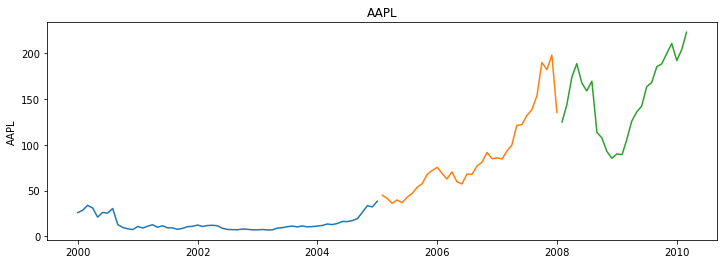

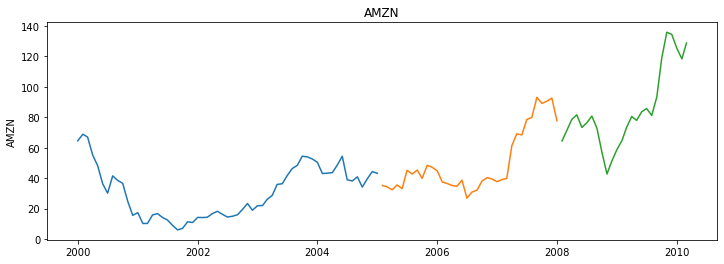

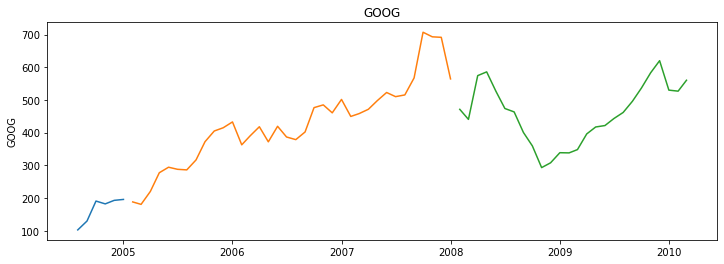

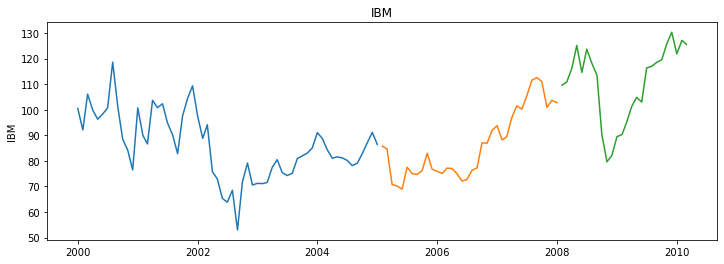

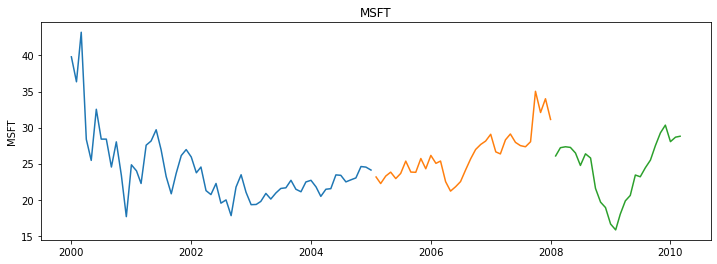

In [35]:
for col in train.columns:
    plt.figure(figsize=(12,4))
    plt.plot(train[col])
    plt.plot(validate[col])
    plt.plot(test[col])
    plt.ylabel(col)
    plt.title(col)
    plt.show()